### You are given a bike rental dataset. The dataset contains temperature information and the bike rental for the given temperature. Build a Simple Linear Regression model to predict the bike rental, given a temperature.

### Step1: Import dataset and do necessary cleaning

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Load the dataset
df = pd.read_csv("bike_rental.csv")
df.head()

,Date,Rented Bike Count,Temperature(C)
0,01/12/2017,254,-5.2
1,01/12/2017,204,-5.5
2,01/12/2017,173,-6.0
3,01/12/2017,107,-6.2
4,01/12/2017,78,-6.0


In [4]:
#Drop Date Column
df = df.drop(columns=["Date"])

In [6]:
df.columns = ["Count", "Temp"]
df

,Count,Temp
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0
...,...,...
8755,1003,4.2
8756,764,3.4
8757,694,2.6
8758,712,2.1


### Step 2: Model Building

In [7]:
#Define x and y variable
x = df["Temp"].to_numpy().reshape(-1, 1)
y = df["Count"].to_numpy().reshape(-1, 1)

#Create Train and Test Datasets with 8:2 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Convert x variables to 2D if necessary - Already done

#Fit a Simple Linear Regression to the Training set
model = LinearRegression()
model.fit(x_train, y_train)

#Find the model parameters
print(f"Coefficient - {model.coef_}")
print(f"Intercept - {model.intercept_}")

Coefficient - [[29.33072306]]
Intercept - [327.34180303]


### Step 3: Model Evaluation 

In [8]:
#Find the RMSE and r2 of the model
model.score(x_test, y_test)

0.2812687252750222

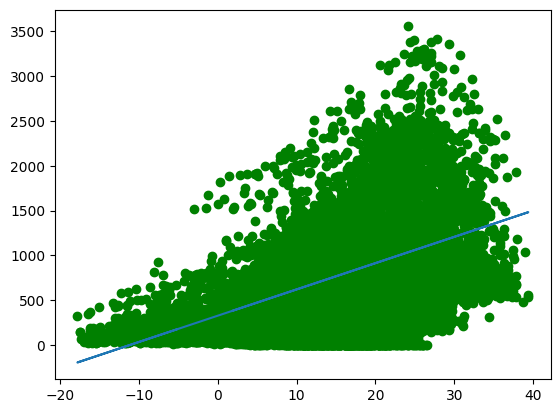

In [10]:
#Plot a scatter plot with test dataset and the trained model
plt.scatter(x, y, c="g")
plt.plot(x, model.coef_*x + model.intercept_)
plt.show()

### Step 4: Model Generalization

In [11]:
#Save model to disk
import pickle
filename = "sairaj_exercise_2.pickle"
pickle.dump(model, open(filename, "wb"))

In [12]:
#Make prediction using saved model on Temperature -6
print(f"{round(model.predict(np.array([-6]).reshape(-1, 1))[0][0])} bicycles will be rented if the temperature is -6 degrees Celsius")

151 bicycles will be rented if the temperature is -6 degrees Celsius
